In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('F:/Data_Storage/train.csv')

In [3]:
df1.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
df1.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

In [6]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               642925 non-null  int64  
 1   VisitNumber            642925 non-null  int64  
 2   Weekday                642925 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              642925 non-null  int64  
 5   DepartmentDescription  642925 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


# Feature Engineering 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Weekday']=le.fit_transform(df2['Weekday'])
df2['DepartmentDescription']=le.fit_transform(df2['DepartmentDescription'])
df2.head()

C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,0,6.811315e+10,-1,20,1000.0
1,30,7,0,6.053882e+10,1,62,8931.0
2,30,7,0,7.410811e+09,1,50,4504.0
3,26,8,0,2.238404e+09,2,49,3565.0
4,26,8,0,2.006614e+09,2,49,1017.0


In [8]:
df2['TripType'].replace({999:45}, inplace=True)
df2.head()

C:\Users\AAA\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,45,5,0,6.811315e+10,-1,20,1000.0
1,30,7,0,6.053882e+10,1,62,8931.0
2,30,7,0,7.410811e+09,1,50,4504.0
3,26,8,0,2.238404e+09,2,49,3565.0
4,26,8,0,2.006614e+09,2,49,1017.0


In [9]:
values = df2.TripType.values
pd.cut(values,7)

[(39.0, 45.0], (27.0, 33.0], (27.0, 33.0], (21.0, 27.0], (21.0, 27.0], ..., (33.0, 39.0], (33.0, 39.0], (33.0, 39.0], (2.958, 9.0], (2.958, 9.0]]
Length: 642925
Categories (7, interval[float64]): [(2.958, 9.0] < (9.0, 15.0] < (15.0, 21.0] < (21.0, 27.0] < (27.0, 33.0] < (33.0, 39.0] < (39.0, 45.0]]

### Categorizing the "39" distinct TripType into the limited set of range in order to make the robust model

In [10]:
df3 = df2.copy()
bins = (2.958,8.25,13.5,18.75,24.0,29.25,34.5,39.75,45.0)
group_names = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8']
df3['TripType'] = pd.cut(df3['TripType'] ,bins = bins, labels = group_names)
df3.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,cat8,5,0,6.811315e+10,-1,20,1000.0
1,cat6,7,0,6.053882e+10,1,62,8931.0
2,cat6,7,0,7.410811e+09,1,50,4504.0
3,cat5,8,0,2.238404e+09,2,49,3565.0
4,cat5,8,0,2.006614e+09,2,49,1017.0


In [11]:
df3['TripType']=le.fit_transform(df3['TripType'])
df3

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,5,0,6.811315e+10,-1,20,1000.0
1,5,7,0,6.053882e+10,1,62,8931.0
2,5,7,0,7.410811e+09,1,50,4504.0
3,4,8,0,2.238404e+09,2,49,3565.0
4,4,8,0,2.006614e+09,2,49,1017.0
...,...,...,...,...,...,...,...
647049,6,191346,3,3.239000e+10,1,52,1118.0
647050,6,191346,3,7.874205e+09,1,21,1752.0
647051,6,191346,3,4.072000e+03,1,57,4170.0
647052,0,191347,3,4.190008e+09,1,16,1512.0


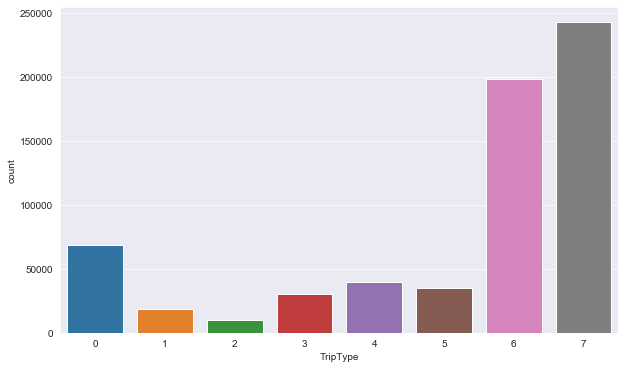

In [12]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
ax = sns.countplot(x="TripType", data=df3)

### The given dataset is imbalanced

### Now Performining the silicing by converting the few number of samples into null values and then dropping them

In [13]:
col1 = df3['VisitNumber'].value_counts()
col2 = df3['Upc'].value_counts()
col3 = df3['Weekday'].value_counts()
col4 = df3['ScanCount'].value_counts()
col5 = df3['DepartmentDescription'].value_counts()
col6 = df3['FinelineNumber'].value_counts()

In [14]:
col1_less_than_10  = col1[col1<10]
col2_less_than_10 = col2[col2<10]
col5_less_than_100 = col5[col5<100]
col6_less_than_100 = col6[col6<100]

In [15]:
df15 = df3.copy()
df15.VisitNumber = df15.VisitNumber.apply(lambda x: np.nan if x in col1_less_than_10 else x)
df15.Upc = df15.Upc.apply(lambda x: np.nan if x in col2_less_than_10 else x)
df15.DepartmentDescription = df15.DepartmentDescription.apply(lambda x: np.nan if x in col5_less_than_100 else x)
df15.FinelineNumber = df15.FinelineNumber.apply(lambda x: np.nan if x in col6_less_than_100 else x)

In [16]:
df15.isnull().sum()

TripType                      0
VisitNumber              246245
Weekday                       0
Upc                      216973
ScanCount                     0
DepartmentDescription       257
FinelineNumber           102479
dtype: int64

In [17]:
df16 = df15.dropna()
df16 = df16.reset_index()
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259374 entries, 0 to 259373
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  259374 non-null  int64  
 1   TripType               259374 non-null  int32  
 2   VisitNumber            259374 non-null  float64
 3   Weekday                259374 non-null  int32  
 4   Upc                    259374 non-null  float64
 5   ScanCount              259374 non-null  int64  
 6   DepartmentDescription  259374 non-null  float64
 7   FinelineNumber         259374 non-null  float64
dtypes: float64(4), int32(2), int64(2)
memory usage: 13.9 MB


### Unique Value Counts of TripType before performing slicing

In [18]:
df3.TripType.value_counts()

7    242823
6    198213
0     68307
4     39354
5     35060
3     30194
1     18842
2     10132
Name: TripType, dtype: int64

### Unique Value Counts of TripType before performing slicing

In [19]:
df16.TripType.value_counts()

7    139629
6     93108
5      8115
4      5329
0      5154
3      5065
2      2113
1       861
Name: TripType, dtype: int64

In [20]:
df16 = df16.drop(columns='index')
x = df16.iloc[:,1:8]
y = df16.TripType

### As from above it can be seen that the difference between the number of samples of each category of  TripType is huge we need to drop the samples with large samples in order to make it comparable with other categorical value

In [21]:
from imblearn.under_sampling import NearMiss
nm = NearMiss({7:75000,6:65000})
X_res,y_res = nm.fit_sample(x,y)

C:\Users\AAA\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy={7: 75000, 6: 65000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({7: 139629, 6: 93108, 5: 8115, 4: 5329, 0: 5154, 3: 5065, 2: 2113, 1: 861})
Resampled dataset shape Counter({7: 75000, 6: 65000, 5: 8115, 4: 5329, 0: 5154, 3: 5065, 2: 2113, 1: 861})


### Now adding some random values to the categorical values those with few number of samples in order to make them comparable with the categorical values that have more number of samples in order to "Balance The Data"

In [23]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler({5:38115, 4:35329, 3:35065, 2:32113, 1:30861, 0:35154})
x2, y2 = os.fit_sample(X_res,y_res)

C:\Users\AAA\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy={5: 38115, 4: 35329, 3: 35065, 2: 32113, 1: 30861, 0: 35154} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [24]:
print('Original dataset shape {}'.format(Counter(y_res)))
print('Resampled dataset shape {}'.format(Counter(y2)))

Original dataset shape Counter({7: 75000, 6: 65000, 5: 8115, 4: 5329, 0: 5154, 3: 5065, 2: 2113, 1: 861})
Resampled dataset shape Counter({7: 75000, 6: 65000, 5: 38115, 4: 35329, 0: 35154, 3: 35065, 2: 32113, 1: 30861})


In [25]:
df17 = pd.DataFrame(x2, columns=x.columns)
df18 = pd.DataFrame(y2, columns=['TripType'])
df19 = pd.concat([df17,df18], axis=1)
df19.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,906.0,0,1.590014e+09,1,56.0,7503.0,0
1,906.0,0,2.898957e+09,1,21.0,1908.0,0
2,906.0,0,7.874209e+09,1,31.0,5010.0,0
3,906.0,0,2.840000e+09,1,17.0,3658.0,0
4,906.0,0,6.827474e+09,1,17.0,2351.0,0


### Performing Shuffling so that samples should not be in sequencewise

In [26]:
df20 = df19.sample(frac = 1)
df20.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
50950,189654.0,3,4.460008e+09,1,30.0,5510.0,6
22183,91999.0,0,7.874211e+09,1,31.0,5010.0,5
144890,34853.0,6,7.874223e+09,1,17.0,4636.0,7
153574,12381.0,2,7.874205e+09,1,21.0,1752.0,7
21375,73070.0,5,5.084418e+09,1,52.0,2012.0,5


# Exploratory Data Analysis

### The Frequency of TripType

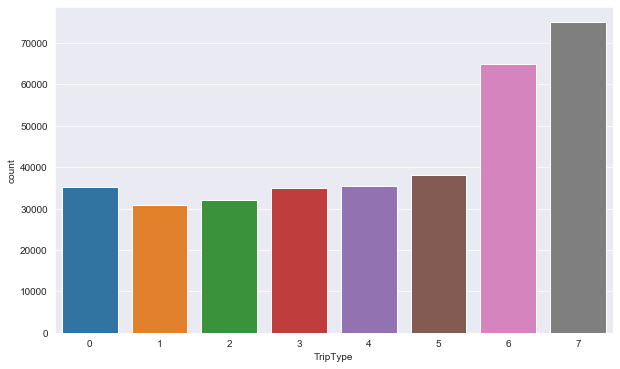

In [27]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
ax = sns.countplot(x="TripType", data=df20)

In [28]:
d1 = df20.groupby(['Weekday']).nunique().reset_index()
d1

,Weekday,VisitNumber,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,0,2924,6071,18,49,1154,8
1,1,2568,5774,15,47,1132,8
2,2,3816,6686,23,50,1191,8
3,3,4296,6867,17,50,1194,8
4,4,2000,5101,17,48,1072,8
5,5,2189,5379,16,47,1102,8
6,6,2056,5214,16,50,1107,8


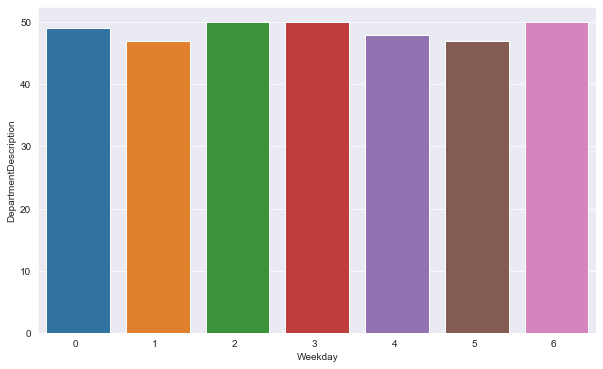

In [29]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="Weekday",y = "DepartmentDescription", data=d1)

### From the above graph we can see that every day their is a slight difference between the different department description eg: Shoes, Personal Care etc for which customers come to buy the product or service from the mart

In [30]:
d6 = df20.groupby(['Weekday']).count().reset_index()
d6

,Weekday,VisitNumber,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,0,51329,51329,51329,51329,51329,51329
1,1,45259,45259,45259,45259,45259,45259
2,2,71975,71975,71975,71975,71975,71975
3,3,74754,74754,74754,74754,74754,74754
4,4,31998,31998,31998,31998,31998,31998
5,5,36917,36917,36917,36917,36917,36917
6,6,34405,34405,34405,34405,34405,34405


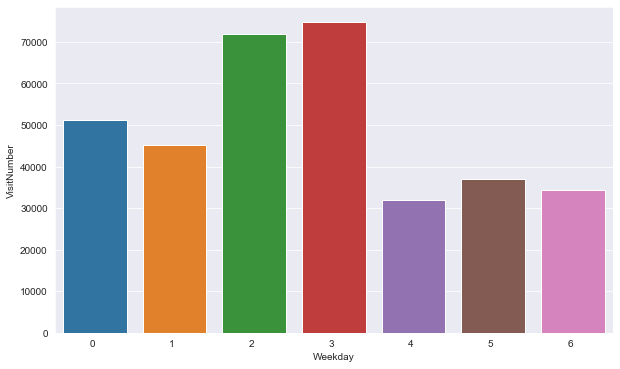

In [31]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="Weekday",y = "VisitNumber", data=d6)

### The above graph tells about the number of customers visiting the store 
### It can be seen that customer footfall is more during mid weekdays

In [32]:
d2 = df20.groupby(['Weekday']).sum().reset_index()
d2

,Weekday,VisitNumber,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,0,4.837237e+09,7.927486e+14,59648,1551745.0,207914611.0,211994
1,1,4.293912e+09,7.475342e+14,52847,1416850.0,175784181.0,188053
2,2,7.346895e+09,1.090623e+15,84967,2214059.0,283688727.0,283500
3,3,8.029590e+09,1.096623e+15,85073,2310734.0,301630537.0,326249
4,4,3.482092e+09,5.533422e+14,37524,966534.0,125073389.0,135792
5,5,3.499435e+09,6.153049e+14,44180,1150389.0,147139661.0,157578
6,6,3.420998e+09,5.360721e+14,39772,1055012.0,132855914.0,144007


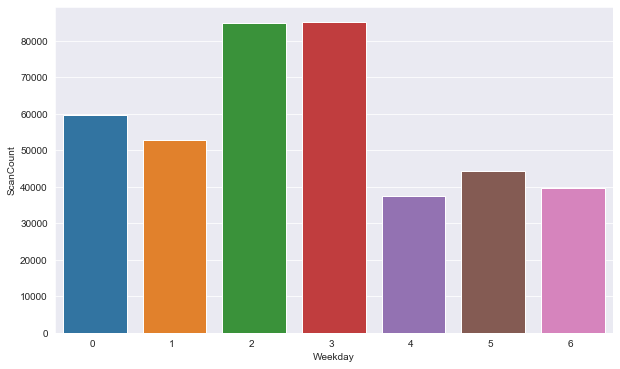

In [33]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="Weekday",y = "ScanCount", data=d2)

### It can be concluded from the above plot that the number of sale of the product or service is more during the mid weekdays (Wednesday and Thursday)

In [34]:
d3 = df20.groupby(['DepartmentDescription']).sum().reset_index()
d3

,DepartmentDescription,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,TripType
0,0.0,3.840387e+06,8,1.634716e+12,24,3600.0,61
1,1.0,1.518328e+07,246,3.169916e+13,107,151057.0,543
2,2.0,6.542409e+07,2063,2.081153e+13,756,2049392.0,2577
3,3.0,4.600257e+08,12968,1.363085e+14,5939,20627078.0,20390
4,4.0,2.552589e+08,6910,2.804107e+14,3227,8473997.0,8138
5,5.0,3.023059e+08,9156,9.626066e+13,3367,13415108.0,12545
6,6.0,6.083817e+07,1614,1.929330e+13,1078,3659139.0,1859
7,7.0,1.594598e+07,486,6.145800e+12,163,973230.0,513
8,8.0,1.012256e+07,385,7.297375e+12,130,479170.0,528
9,11.0,5.595070e+08,15696,2.875271e+13,7014,1825640.0,25143


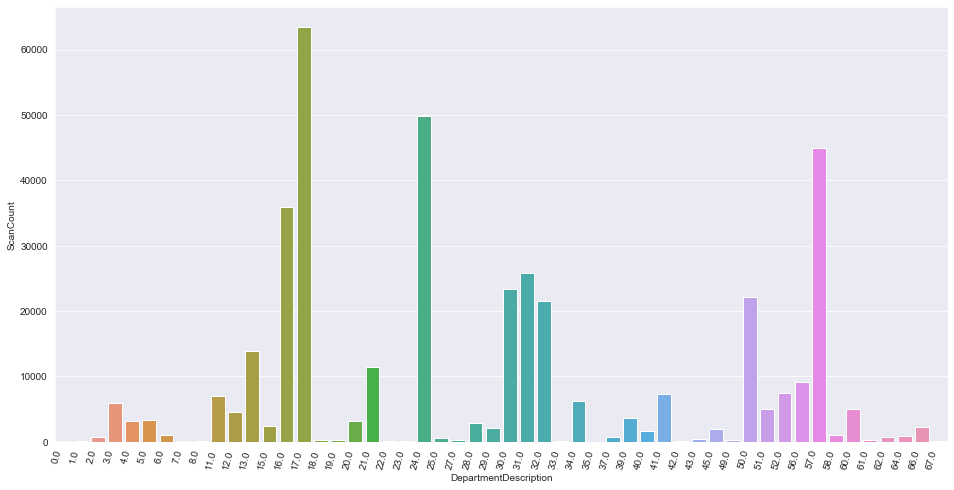

In [35]:
plt.figure(figsize=(16,8))
sns.set_style(style="darkgrid")
plt.xticks(rotation=75, ha='right')
ax = sns.barplot(x="DepartmentDescription",y = "ScanCount", data=d3)

### The above graph tells about the sales of product or service of the different Department Description based on the ScanCount

In [36]:
d4 = df20.groupby(['TripType']).nunique().reset_index()
d4

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,0,645,7,2899,12,39,904
1,1,75,7,603,8,32,333
2,2,266,7,1351,10,37,591
3,3,713,7,2944,12,45,963
4,4,982,7,3150,11,49,990
5,5,975,7,3816,21,48,1003
6,6,8239,7,6238,21,43,1007
7,7,7954,7,4530,19,33,804


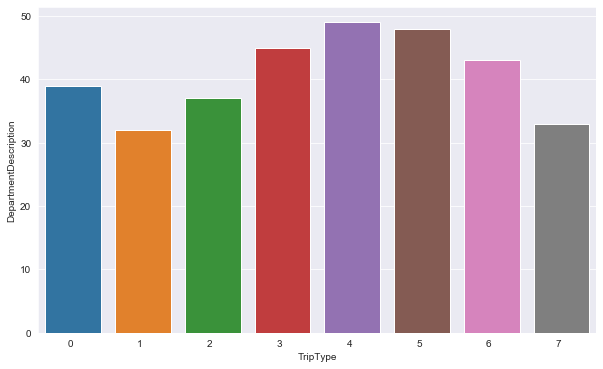

In [37]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="TripType",y = "DepartmentDescription", data=d4)

### Above plot tells about the total number of different departments for which customers had made a trip to buy or for taking the service

In [38]:
d6 = df20.groupby(['TripType']).count().reset_index()
d6

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,0,35154,35154,35154,35154,35154,35154
1,1,30861,30861,30861,30861,30861,30861
2,2,32113,32113,32113,32113,32113,32113
3,3,35065,35065,35065,35065,35065,35065
4,4,35329,35329,35329,35329,35329,35329
5,5,38115,38115,38115,38115,38115,38115
6,6,65000,65000,65000,65000,65000,65000
7,7,75000,75000,75000,75000,75000,75000


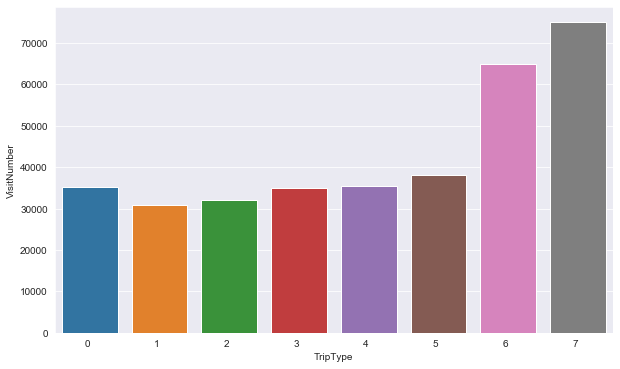

In [39]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="TripType",y = "VisitNumber", data=d6)

### The Plot tells about the total number of customers for each triptype 

In [40]:
d5 = df20.groupby(['TripType']).sum().reset_index()
d5

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,0,3.449871e+09,102232,5.394943e+14,41253,1177758.0,145700144.0
1,1,4.398731e+09,69718,4.530970e+14,36064,946249.0,131019559.0
2,2,2.804030e+09,79050,5.230298e+14,40057,871665.0,118985938.0
3,3,3.345068e+09,97134,8.784479e+14,41526,1016524.0,136065388.0
4,4,3.423960e+09,96690,1.064869e+15,40475,1159961.0,132652897.0
5,5,3.782839e+09,106234,5.617510e+14,45836,1199581.0,134658529.0
6,6,6.417028e+09,178190,6.257116e+14,72302,2032803.0,266430339.0
7,7,7.288633e+09,203230,7.858478e+14,86498,2260782.0,308574226.0


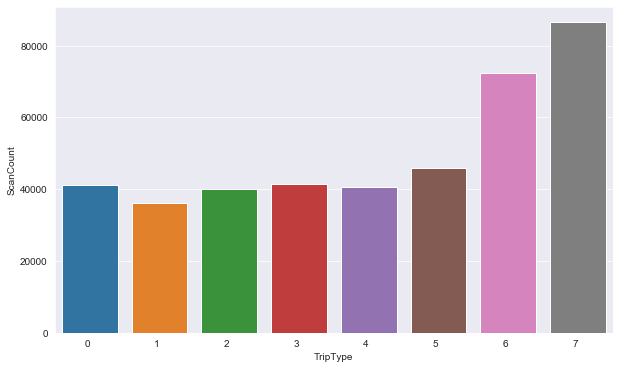

In [41]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
plt.xticks(rotation=0, ha='right')
ax = sns.barplot(x="TripType",y = "ScanCount", data=d5)

### The total number of sale made in the different TripType

## Co-Relation Plot between the Features

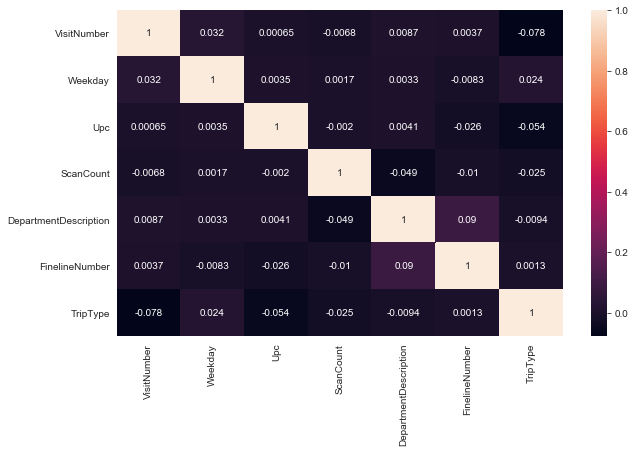

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df20.corr(), annot=True)

In [43]:
df20.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
50950,189654.0,3,4.460008e+09,1,30.0,5510.0,6
22183,91999.0,0,7.874211e+09,1,31.0,5010.0,5
144890,34853.0,6,7.874223e+09,1,17.0,4636.0,7
153574,12381.0,2,7.874205e+09,1,21.0,1752.0,7
21375,73070.0,5,5.084418e+09,1,52.0,2012.0,5


In [44]:
df20 = df20.reset_index()
Df   = df20.drop(columns='index')
Df.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,189654.0,3,4.460008e+09,1,30.0,5510.0,6
1,91999.0,0,7.874211e+09,1,31.0,5010.0,5
2,34853.0,6,7.874223e+09,1,17.0,4636.0,7
3,12381.0,2,7.874205e+09,1,21.0,1752.0,7
4,73070.0,5,5.084418e+09,1,52.0,2012.0,5


In [46]:
DF = Df.copy()
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346637 entries, 0 to 346636
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VisitNumber            346637 non-null  float64
 1   Weekday                346637 non-null  int32  
 2   Upc                    346637 non-null  float64
 3   ScanCount              346637 non-null  int64  
 4   DepartmentDescription  346637 non-null  float64
 5   FinelineNumber         346637 non-null  float64
 6   TripType               346637 non-null  int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 15.9 MB


In [47]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(DF[['VisitNumber','Upc','FinelineNumber']])
DF[['VisitNumber','Upc','FinelineNumber']] = Scaler.fit_transform(DF[['VisitNumber','Upc','FinelineNumber']])
DF.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,1.608326,3,-0.223265,1,30.0,0.536142,6
1,-0.157536,0,-0.155273,1,31.0,0.362739,5
2,-1.190887,6,-0.155273,1,17.0,0.233035,7
3,-1.597241,2,-0.155274,1,21.0,-0.767149,7
4,-0.499823,5,-0.210830,1,52.0,-0.676980,5


## Model Preparation

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

In [50]:
x3 = DF.iloc[:30000,0:6].values
y3 = DF.iloc[:30000,-1].values
x4 = DF.iloc[30000:40000,0:6].values
y4 = DF.iloc[30000:40000,-1].values

## Bayesian Optimization Working
### Bayesian optimization works by constructing a posterior distribution of functions (gaussian process) that best describes the function you want to optimize. As the number of observations grows, the posterior distribution improves, and the algorithm becomes more certain of which regions in parameter space are worth exploring and which are not.

### Hyperparameter tuning of XGBoostingClassifier using Bayesian optimization

In [51]:
def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample, data, target):
    estimator = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                gamma=gamma,
                min_child_weight=min_child_weight,
                subsample=subsample,
                random_state=2
    )
    cval = cross_val_score(estimator, data, target, scoring='f1_micro', cv=5)
    
    return cval.mean()

### Parameters Description

#### 'min_child_weight' : 
#### Defines the minimum sum of weights of all observations require
#### Used to control over-fitting. Higher values prevent a model from learning relation which might be highly specific to the particular sample selected for a tree

#### 'max_depth' :
#### Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample

#### 'gamma' :
#### A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split

#### 'subsample' :
#### Denotes the fraction of observations to be randomly samples for each tree
#### Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting

#### 'n_estimators' :
#### This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower

In [52]:
def optimize_xgb(data, target):
    def xgb_crossval(n_estimators, max_depth, gamma, min_child_weight, subsample):
        return xgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            gamma=gamma,
            min_child_weight=min_child_weight,
            subsample=subsample,
            data=data,
            target=target,
        )
    optimizer = BayesianOptimization(
            f=xgb_crossval,
            pbounds={
                "n_estimators":(100,550),
                "max_depth": (1,20),
                "gamma":(0,10),
                "min_child_weight":(0,10),
                "subsample":(0.8,1.0)
                },
            random_state=1234,
            verbose=2
      )
    optimizer.maximize(n_iter=15 , init_points=5)
    
    
    print('Final Result:', optimizer.max)

In [53]:
print(Colours.red("--- Optimizing XGBoost ---"))
optimize_xgb(x3,y3)

--- Optimizing XGBoost ---
|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.6131   |  1.915    |  12.82    |  4.377    |  453.4    |  0.956    |
|  2        |  0.5304   |  2.726    |  6.253    |  8.019    |  531.2    |  0.9752   |
|  3        |  0.5527   |  3.578    |  10.52    |  6.835    |  420.7    |  0.8741   |
|  4        |  0.5429   |  5.612    |  10.56    |  0.1377   |  447.8    |  0.9765   |
|  5        |  0.5696   |  3.649    |  12.69    |  0.7538   |  266.0    |  0.9866   |
|  6        |  0.4729   |  5.153    |  4.448    |  3.77     |  134.2    |  0.8525   |
|  7        |  0.5814   |  3.824    |  16.61    |  4.05     |  436.9    |  0.9551   |
|  8        |  0.5845   |  1.111    |  5.153    |  6.716    |  486.7    |  0.9595   |
|  9        |  0.5389   |  8.317    |  16.32    |  0.9797   |  271.3    |  0.9759   |
|  10       |  0.4623   |  

In [60]:
xgb = XGBClassifier(n_estimators=int(465.1869382718692),
                         max_depth=int(7.272703995703662),
                         subsample=1.0,
                         min_child_weight=0.0,
                         gamma=0.0,
                         random_state = 42)

## Hyperparameter tuning of RandomForestClassifier using Bayesian optimization

In [54]:
def rfc_cv(n_estimators, min_samples_split, max_features, data, target):
    estimator = RandomForestClassifier(
            n_estimators=n_estimators,
            min_samples_split=min_samples_split,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
    )
    cval = cross_val_score(estimator, data, target, scoring='f1_micro', cv=5)
    
    return cval.mean()

In [55]:
def optimize_rfc(data, target):
    def rfc_crossval(n_estimators, min_samples_split, max_features):
        return rfc_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.9), 1e-3),
            data=data,
            target=target,
            )
    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators":(100,550),
            "min_samples_split":(2,25),
            "max_features":(0.1,0.9),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10, init_points=5)
    
    print("Final result:", optimizer.max)

In [56]:
print(Colours.green("--- Optimizing Random Forest ---"))
optimize_rfc(x3, y3)

--- Optimizing Random Forest ---
|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.4805   |  0.2532   |  16.31    |  297.0    |
|  2        |  0.4866   |  0.7283   |  19.94    |  222.7    |
|  3        |  0.4702   |  0.3212   |  20.44    |  531.2    |
|  4        |  0.5231   |  0.8007   |  10.23    |  325.4    |
|  5        |  0.4846   |  0.6468   |  18.39    |  266.6    |
|  6        |  0.5285   |  0.8111   |  9.405    |  325.1    |
|  7        |  0.5625   |  0.8991   |  4.855    |  326.9    |
|  8        |  0.5456   |  0.1799   |  3.219    |  333.5    |
|  9        |  0.5624   |  0.8984   |  2.133    |  320.3    |
|  10       |  0.5413   |  0.6961   |  6.44     |  100.0    |
|  11       |  0.5134   |  0.5282   |  10.33    |  116.9    |
|  12       |  0.4679   |  0.6609   |  23.26    |  100.1    |
|  13       |  0.5392   |  0.2616   |  2.276    |  362.2    |
|  14       |  0.5409   |  0.2963   |

## Hyperparameter tuning of ExtremeGradientBoosting and RandomForest Classifier using Bayesian optimization

In [57]:
def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample, data, targets):
    estimator = XGBRFClassifier(
        n_estimators=n_estimators,
        max_depth = max_depth,
        gamma = gamma,
        min_child_weight=min_child_weight,
        subsample = subsample,
        random_state = 2,
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='f1_micro', cv=5)
    return cval.mean()

In [58]:
def optimize_xgb(data, targets):
    def xgb_crossval(n_estimators, max_depth, gamma, min_child_weight, subsample):
        return xgb_cv(
            n_estimators=int(n_estimators),
            max_depth = int(max_depth),
            gamma = gamma,
            min_child_weight=min_child_weight,
            subsample=subsample,
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=xgb_crossval,
        pbounds={
            "n_estimators": (100, 600),
            "max_depth": (6,15),
            "gamma": (0,10),
            "min_child_weight": (0,10),
            "subsample": (0.8,1.0)
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10, init_points=5)

    print("Final result:", optimizer.max)

In [59]:
print(Colours.red("--- Optimizing XGBoost RandomForest ---"))
optimize_xgb(x3, y3)

--- Optimizing XGBoost RandomForest ---
|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.4354   |  1.915    |  11.6     |  4.377    |  492.7    |  0.956    |
|  2        |  0.3933   |  2.726    |  8.488    |  8.019    |  579.1    |  0.9752   |
|  3        |  0.4141   |  3.578    |  10.51    |  6.835    |  456.4    |  0.8741   |
|  4        |  0.4394   |  5.612    |  10.53    |  0.1377   |  486.4    |  0.9765   |
|  5        |  0.4569   |  3.649    |  11.54    |  0.7538   |  284.4    |  0.9866   |
|  6        |  0.408    |  9.75     |  10.44    |  5.69     |  254.2    |  0.892    |
|  7        |  0.4462   |  5.663    |  11.66    |  1.116    |  285.5    |  0.8977   |
|  8        |  0.393    |  0.4616   |  7.711    |  0.4192   |  279.7    |  0.8409   |
|  9        |  0.4951   |  2.636    |  13.87    |  0.3876   |  286.0    |  1.0      |
|  10       | 

### So from the accuracies (f1_score) of each of the Ensembling Techniques the XGBoostClassifier gives the best accuracy that is the best f1_score value and hence its my final model
### Now checking the model performance by plotting the Learning Curve
### Metric Used : 'f1_micro' - Calculate metrics globally by counting the total true positives, false negatives and false positives¶
### 'f1_micro' score reaches its best value at 1 and worst score at 0

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
xgb , x3, y3, train_sizes=np.linspace(0.01, 1.0, 10), scoring='f1_micro', cv=5)

In [62]:

train_scores_mean =  train_scores.mean(axis = 1)
valid_scores_mean =  valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean valid scores\n\n',pd.Series(valid_scores_mean, index = train_sizes))

Mean training scores

 240      1.000000
2880     1.000000
5520     1.000000
8160     1.000000
10800    0.999981
13440    0.999464
16080    0.998545
18720    0.997062
21360    0.994157
24000    0.992567
dtype: float64

 --------------------

Mean valid scores

 240      0.213000
2880     0.368767
5520     0.447667
8160     0.511400
10800    0.559200
13440    0.594433
16080    0.625033
18720    0.648767
21360    0.670833
24000    0.687833
dtype: float64


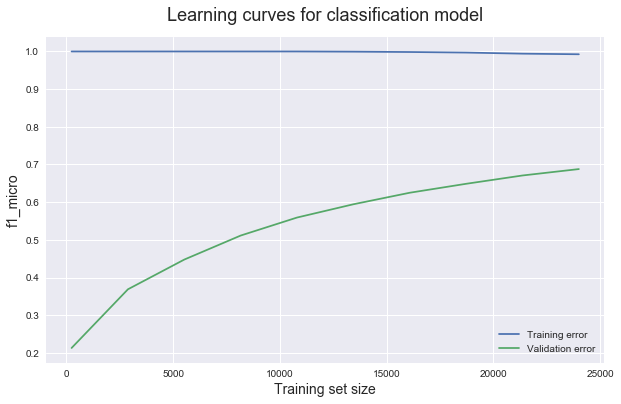

In [63]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, valid_scores_mean, label = 'Validation error')
plt.ylabel('f1_micro', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for classification model', fontsize = 18, y = 1.03)
plt.legend()

### For the evalution of the model accuracy ploting the confusion matrix

In [64]:
clf = xgb.fit(x3,y3)
y_pred = clf.predict(x4)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y4, y_pred)

Text(88.0, 0.5, 'Truth')

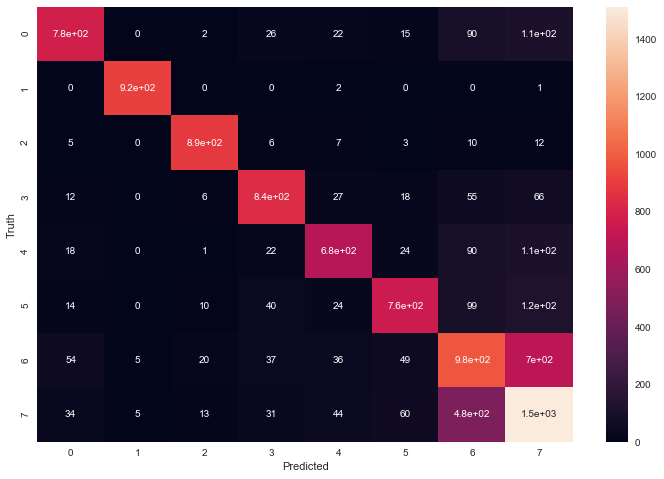

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Calculating the multi-class metrics

In [74]:
from sklearn import metrics
print(metrics.classification_report(y4, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1047
           1       0.99      1.00      0.99       918
           2       0.94      0.95      0.95       930
           3       0.84      0.82      0.83      1028
           4       0.81      0.72      0.76       948
           5       0.82      0.71      0.76      1067
           6       0.54      0.52      0.53      1880
           7       0.57      0.69      0.63      2182

    accuracy                           0.74     10000
   macro avg       0.80      0.77      0.78     10000
weighted avg       0.75      0.74      0.74     10000

